In [20]:
from scipy.io import arff
import pandas as pd
import numpy as np
df = pd.read_csv('Genes_Atividade_IA.csv')
df = df[df[list(df)] < 150]
df = df.dropna()
X = df.drop('class', axis=1).values

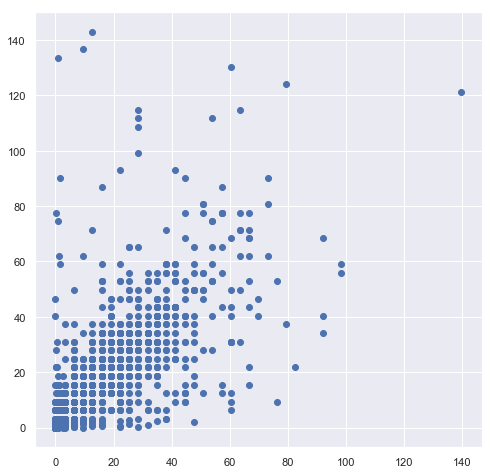

In [136]:
def plot_cluster_data(X, c=[1]*X.shape[0], mu=None):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1)
    if len(np.unique(c)) == 1:
        ax.plot(X[:,0], X[:,1], 'o')
    else:
        ix = np.where(c==1)
        ax.plot(X[ix,0], X[ix,1], 'o', 
                markerfacecolor='red')
        ax.plot(mu[0,0], mu[0,1], 'o', 
                markerfacecolor='red', 
                markersize=12)
        ix = np.where(c==0)
        ax.plot(X[ix,0], X[ix,1], 'o', 
                markerfacecolor='green')
        ax.plot(mu[1,0], mu[1,1], 'o', 
                markerfacecolor='green', 
                markersize=12)
    if not mu is None:
        ax.plot(mu[0,0], mu[0,1], 'o', 
                markerfacecolor='red', 
                markersize=12)
        ax.plot(mu[1,0], mu[1,1], 'o', 
                markerfacecolor='green', 
                markersize=12)        
    plt.show()

plot_cluster_data(X)

Counter({0: 595, 4: 453, 1: 282, 2: 99, 3: 78})


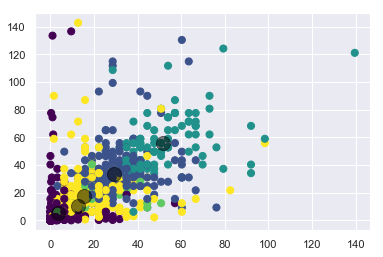

In [189]:
#KMeans
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,max_iter=100, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)
from collections import Counter, defaultdict
print(Counter(kmeans.labels_))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

Counter({0: 530, 1: 369, 2: 351, 4: 177, 3: 80})


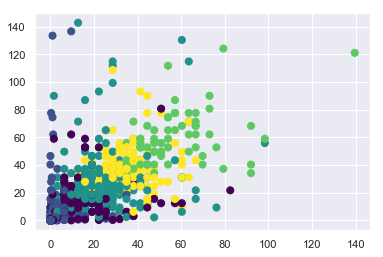

In [8]:
#Hirárquico 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=5).fit(X)
y_clust = clustering.fit_predict(X)
from collections import Counter, defaultdict
print(Counter(clustering.labels_))
plt.scatter(X[:, 0], X[:, 1], c=y_clust, s=50, cmap='viridis')
plt.show()

Counter({0: 530, 1: 369, 2: 351, 4: 177, 3: 80})


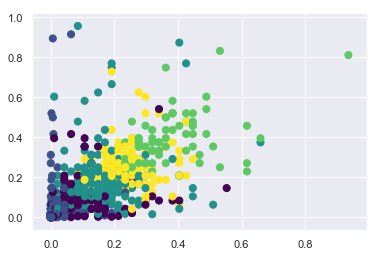

In [21]:
#Normalização
X =(X-X.min())/(X.max()-X.min())
#Hirárquico 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=5).fit(X)
y_clust = clustering.fit_predict(X)
from collections import Counter, defaultdict
print(Counter(clustering.labels_))
plt.scatter(X[:, 0], X[:, 1], c=y_clust, s=50, cmap='viridis')
plt.show()

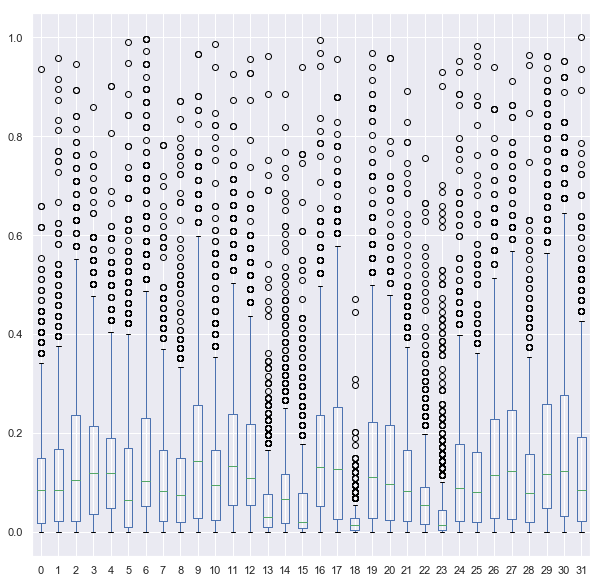

In [25]:
data = pd.DataFrame(X)
data.boxplot(figsize=(10,10))